In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
cd=pd.read_csv("C:\\Users\\rabhi\\OneDrive\\Documents\\Data_Clinical_Final.csv")

In [190]:
cd1=pd.read_csv("C:\\Users\\rabhi\\OneDrive\\Documents\\Data_Clinical_Final_1.csv")

In [191]:
cd=cd.drop(['dominant_topic','NCT Number'],axis=1)

In [192]:
cd=cd.drop(['Rank'],axis=1)

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a TfidfVectorizer object
vectorizer = CountVectorizer()

l=['Title','Conditions','Interventions','Outcome Measures','Sponsor/Collaborators','Age','Funded Bys','Other IDs','Locations']

for i in l:
    vectorizer.fit(cd[i]) # Fit the vectorizer to the text data
    tfidf_representation = vectorizer.transform(cd[i]) # Transform the text data into a Bag-of-Words representation
    cd[i]=tfidf_representation.toarray()

In [194]:
cd

,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,...,Completion Date,First Posted,Last Update Posted,Locations,Allocation,IModel,Masking,Primary Purpose,Omodel,Time Perspective
0,0,Completed,No Results Available,0,0,0,0,All,0,Not Applicable,...,"May 31, 2022","May 10, 2023","May 10, 2023",0,Allocation: Non-Randomized,Intervention Model: Single Group Assignment,Masking: Single (Participant),Primary Purpose: Treatment,None,None
1,0,Completed,No Results Available,0,0,0,0,Female,0,Not Applicable,...,"March 15, 2023","May 10, 2023","May 10, 2023",0,Allocation: N/A,Intervention Model: Single Group Assignment,Masking: None (Open Label),Primary Purpose: Treatment,None,None
2,0,Completed,No Results Available,0,0,0,0,All,0,Phase 2,...,"August 27, 2022","May 10, 2023","May 10, 2023",0,Allocation: Randomized,Intervention Model: Parallel Assignment,"Masking: Triple (Participant, Investigator, Ou...",Primary Purpose: Treatment,None,None
3,0,Completed,No Results Available,0,0,0,0,All,0,Not Applicable,...,"April 7, 2022","May 10, 2023","May 10, 2023",0,Allocation: Randomized,Intervention Model: Parallel Assignment,Masking: None (Open Label),Primary Purpose: Treatment,None,None
4,0,Completed,No Results Available,0,0,0,0,All,0,Not Applicable,...,"July 20, 2020","May 10, 2023","May 10, 2023",0,Allocation: Randomized,Intervention Model: Parallel Assignment,"Masking: Quadruple (Participant, Care Provider...",Primary Purpose: Treatment,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,Completed,No Results Available,0,0,0,0,All,0,Not Applicable,...,"February 2, 2023","January 4, 2022","March 7, 2023",0,None,None,None,None,Observational Model: Cohort,Time Perspective: Retrospective
9992,0,Terminated,No Results Available,0,0,0,0,All,0,Not Applicable,...,"November 30, 2022","January 4, 2022","June 7, 2022",0,None,None,None,None,Observational Model: Cohort,Time Perspective: Prospective
9993,0,Completed,No Results Available,0,0,0,0,All,0,Not Applicable,...,"October 10, 2022","January 4, 2022","November 1, 2022",0,None,None,None,None,Observational Model: Case-Only,Time Perspective: Prospective
9994,0,Completed,No Results Available,0,0,0,0,All,0,Not Applicable,...,"June 10, 2020","January 3, 2022","February 21, 2023",0,None,None,None,None,Observational Model: Cohort,Time Perspective: Retrospective


In [195]:
l1=['Status','Study Results','Gender','Phases','Study Type','Allocation','IModel','Masking','Primary Purpose','Omodel','Time Perspective']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in l1:
    cd[feat] = le.fit_transform(cd[feat].astype(str))

print (cd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    9996 non-null   int64 
 1   Status                   9996 non-null   int32 
 2   Study Results            9996 non-null   int32 
 3   Conditions               9996 non-null   int64 
 4   Interventions            9996 non-null   int64 
 5   Outcome Measures         9996 non-null   int64 
 6   Sponsor/Collaborators    9996 non-null   int64 
 7   Gender                   9996 non-null   int32 
 8   Age                      9996 non-null   int64 
 9   Phases                   9996 non-null   int32 
 10  Enrollment               9996 non-null   int64 
 11  Funded Bys               9996 non-null   int64 
 12  Study Type               9996 non-null   int32 
 13  Other IDs                9996 non-null   int64 
 14  Start Date               9996 non-null  

In [196]:
cd=cd.drop(['Start Date','Primary Completion Date','Completion Date','First Posted','Last Update Posted'],axis=1)

In [197]:
x=cd.drop(['Status'],axis=1)
y=cd['Status']

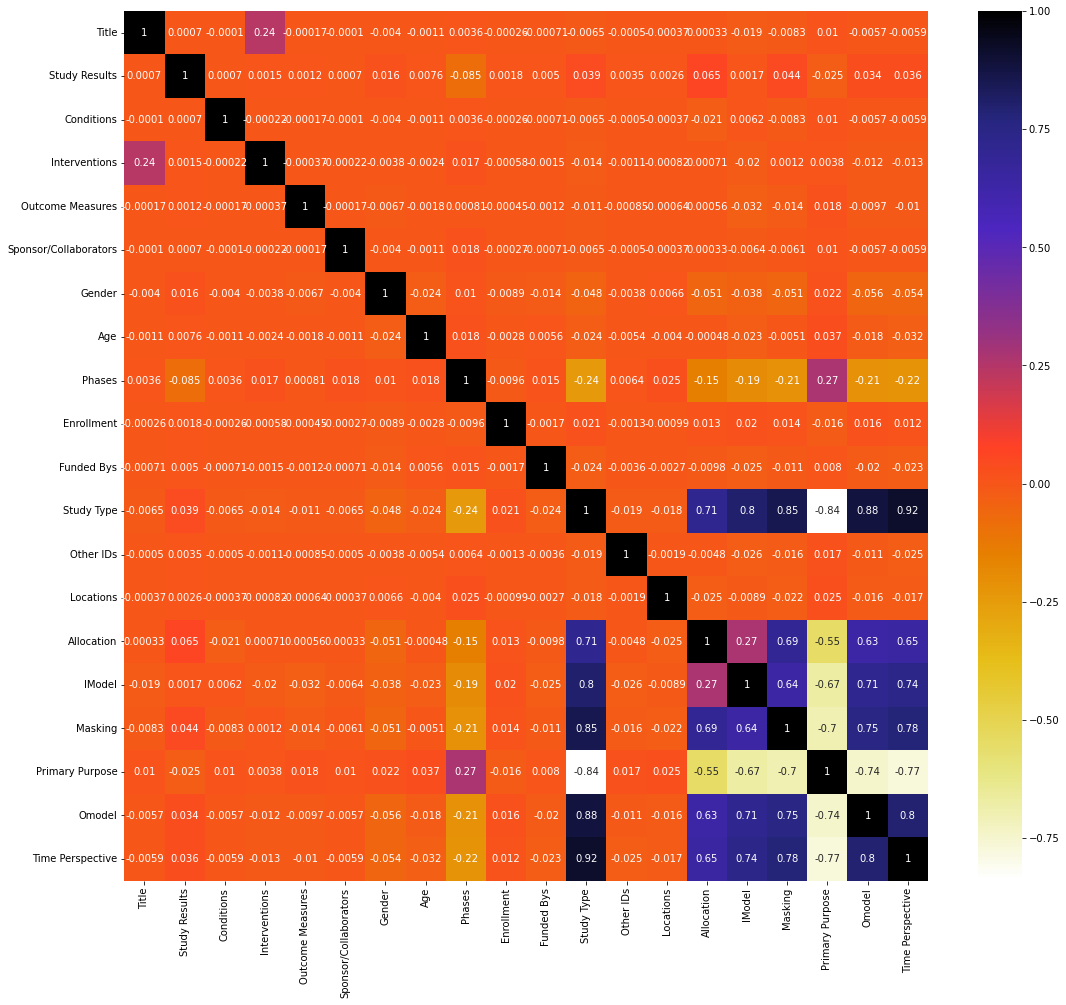

In [198]:
plt.figure(figsize=(18,16))
cor=x.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [199]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j])) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [200]:
corr_features = correlation(x, 0.80)
len(set(corr_features))

5

In [201]:
x=x.drop(corr_features,axis=1)

In [202]:
corr_features

{'IModel', 'Masking', 'Omodel', 'Primary Purpose', 'Time Perspective'}

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
lr=LogisticRegression(class_weight='balanced')

In [207]:
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [208]:
y_pred_lr=lr.predict(x_test)
print("Predicted Class: {}".format(y_pred_lr))

Predicted Class: [0 0 0 ... 0 0 0]


In [209]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score

In [210]:
recall_score(y_test,y_pred_lr,average='weighted')

0.9549849949983328

In [211]:
precision_score(y_test,y_pred_lr,average='weighted')

0.9570569437454263

In [212]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [213]:
l=cd1.drop(['Result'],axis=1).select_dtypes(exclude='object').columns

In [214]:
for f in l:
    cd1[f]=s.fit_transform(cd1[f].to_numpy().reshape(-1,1))

In [215]:
cd1

,Age,Gender,Total_Bilirubin REAL,Direct_Bilirubin REAL,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins REAL,Albumin REAL,Albumin_and_Globulin REAL,Result
0,1.252098,Female,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147961,1
1,1.066637,Male,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650760,1
2,1.066637,Male,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179386,1
3,0.819356,Male,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166288,1
4,1.684839,Male,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719207,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.942997,Male,-0.451114,-0.493964,0.862786,-0.332743,-0.262967,-0.537740,-1.939837,-1.813482,2
579,-0.293407,Male,-0.434996,-0.493964,-0.793378,-0.250535,-0.273359,-0.445534,0.073157,0.480537,1
580,0.448435,Male,-0.402760,-0.458327,-0.187766,-0.179288,-0.211005,-0.076707,0.073157,0.166288,1
581,-0.849789,Male,-0.322169,-0.351417,-0.439074,-0.283418,-0.269895,0.292120,0.324781,0.166288,1


In [216]:
cd1['Gender'] = le.fit_transform(cd1['Gender'].astype(str))
print (cd1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Gender                      583 non-null    int32  
 2   Total_Bilirubin REAL        583 non-null    float64
 3   Direct_Bilirubin REAL       583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Proteins REAL         583 non-null    float64
 8   Albumin REAL                583 non-null    float64
 9   Albumin_and_Globulin REAL   583 non-null    float64
 10  Result                      583 non-null    int64  
dtypes: float64(9), int32(1), int64(1)
memory usage: 47.9 KB
None


In [217]:
x1=cd1.drop(['Result'],axis=1)
y1=cd1['Result']

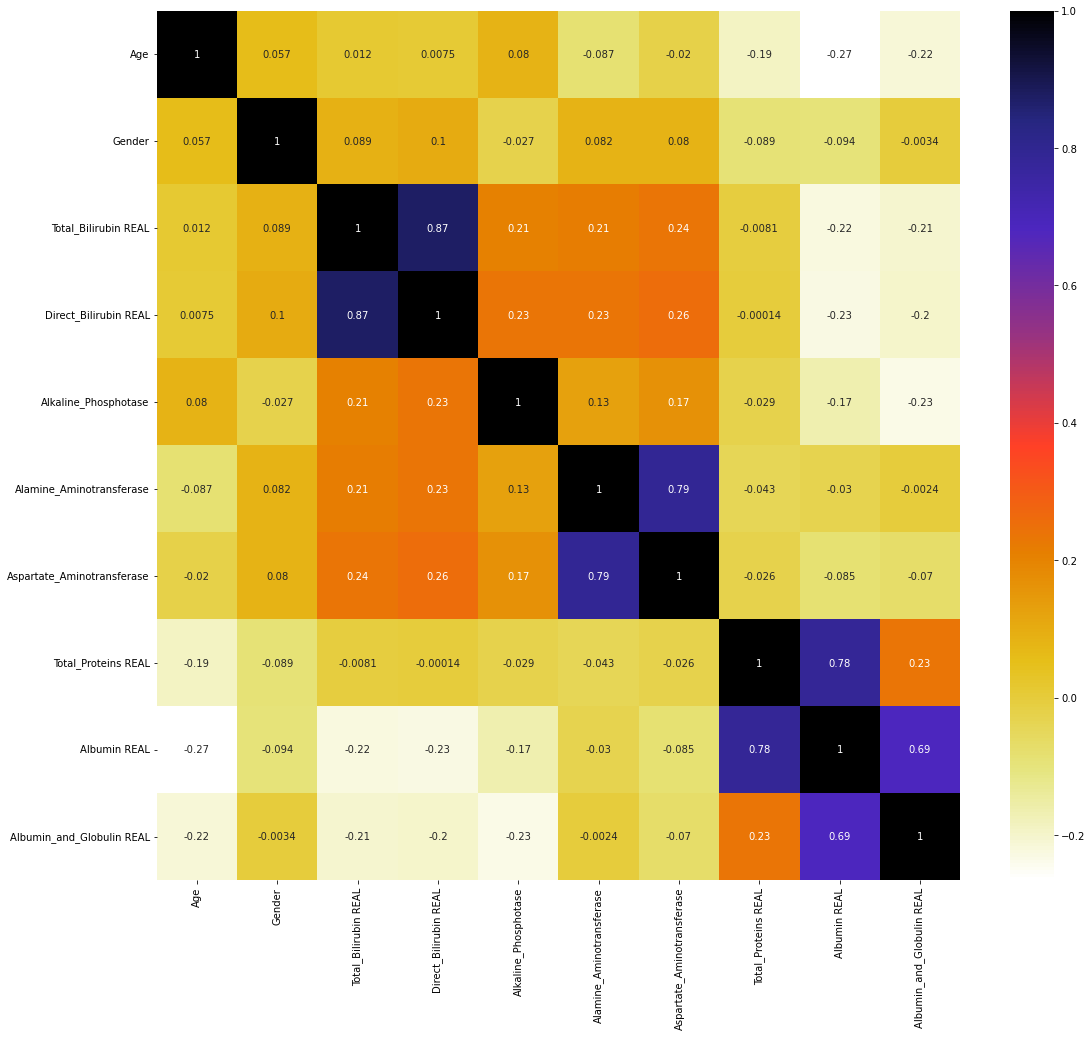

In [218]:
plt.figure(figsize=(18,16))
cor=x1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [219]:
corr_features1 = correlation(x1, 0.75)
len(set(corr_features1))

3

In [220]:
x1=x1.drop(corr_features1,axis=1)

In [221]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=100)

In [222]:
lr1=LogisticRegression()

In [223]:
lr1.fit(x1_train,y1_train)

LogisticRegression()

In [224]:
y_pred_lr1=lr1.predict(x1_test)

In [225]:
y_pred_lr1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [228]:
precision_score(y1_test,y_pred_lr1,average='weighted')

0.6311393869288606

In [229]:
recall_score(y1_test,y_pred_lr1,average='weighted')

0.6971428571428572